In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
X = pd.read_csv('creditcard.csv')


X = X.drop('CUST_ID', axis = 1)

X.fillna(method ='ffill', inplace = True)

print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

<ipython-input-2-40fe016c1c05>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)


In [4]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [5]:
db_default = DBSCAN(0.01).fit(X_principal)
labels = db_default.labels_

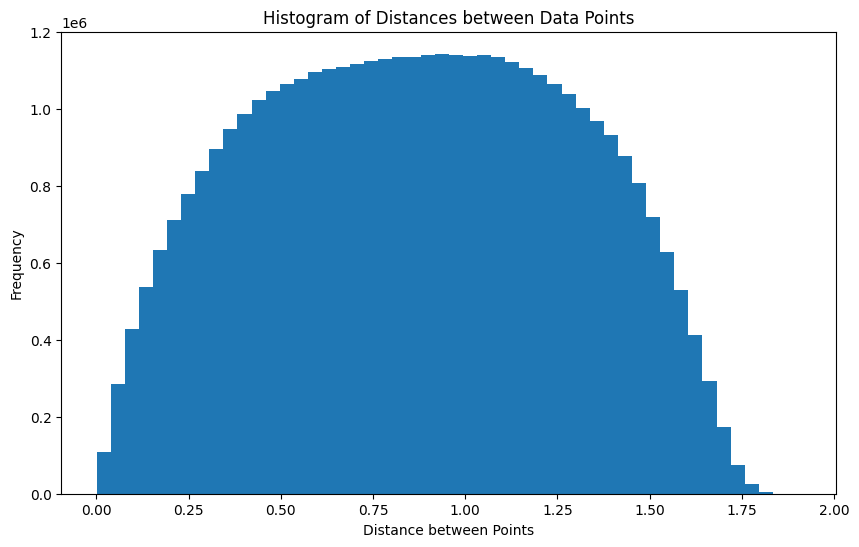

In [6]:


import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


distances = pdist(X_principal)

distance_matrix = squareform(distances)

distances_flat = distance_matrix[np.triu_indices(distance_matrix.shape[0], k=1)]


plt.figure(figsize=(10, 6))
plt.hist(distances_flat, bins=50)
plt.xlabel('Distance between Points')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between Data Points')
plt.show()

Best parameters: radius = 0.3, min_samples = 1100
Estimated number of clusters: 2
Estimated number of noise points: 1965
Silhouette Coefficient: 0.4338804411872774


<ipython-input-13-7f3b74db1b7d>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_clusters)  # Use a colormap


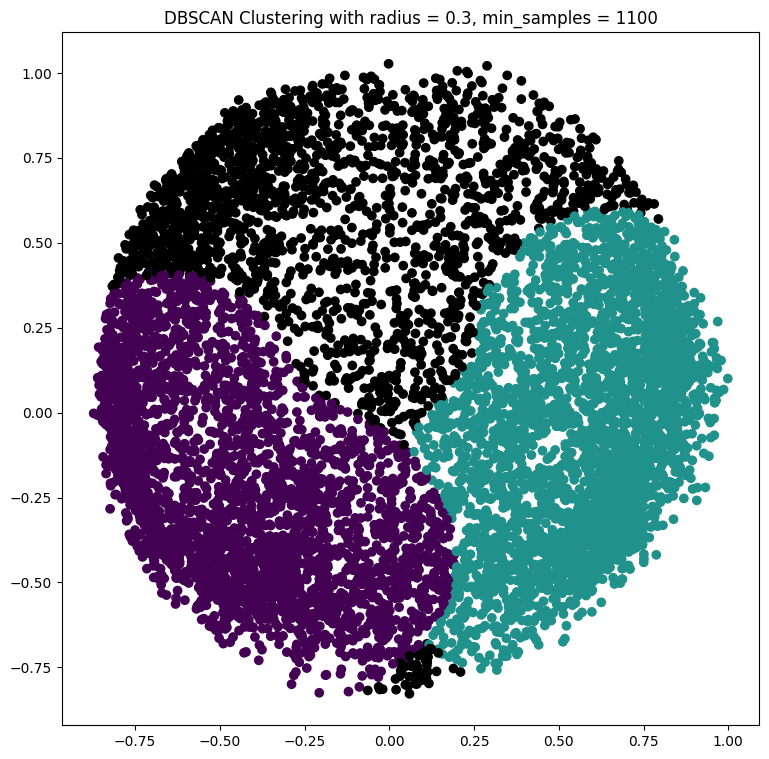

In [13]:
from sklearn.metrics import silhouette_score

# ... (Your existing code for data loading and preprocessing)

# Hyperparameter combinations
radius_values = [0.3, 0.4]
min_samples_values = [1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 2000]

best_silhouette = -1  # Initialize with a value less than the minimum possible Silhouette score
best_params = {}
best_labels = []

for radius in radius_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=radius, min_samples=min_samples).fit(X_principal)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1:  # Silhouette score requires more than one cluster
            silhouette_avg = silhouette_score(X_principal, labels)

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_params = {'radius': radius, 'min_samples': min_samples}
                best_labels = labels
                best_n_clusters = n_clusters_
                best_n_noise = n_noise_

# Plot the best result
if best_silhouette > -1:  # Check if a valid result was found
    print(f"Best parameters: radius = {best_params['radius']}, min_samples = {best_params['min_samples']}")
    print(f"Estimated number of clusters: {best_n_clusters}")
    print(f"Estimated number of noise points: {best_n_noise}")
    print(f"Silhouette Coefficient: {best_silhouette}")

    # Dynamically generate colors
    num_clusters = max(best_n_clusters, 3)  # Ensure at least 3 colors
    colors = plt.cm.get_cmap('viridis', num_clusters)  # Use a colormap

    # Assign colors
    cvec = [colors(label) if label >= 0 else 'k' for label in best_labels]

    plt.figure(figsize=(9, 9))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
    plt.title(f'DBSCAN Clustering with radius = {best_params["radius"]}, min_samples = {best_params["min_samples"]}')
    plt.show()
else:
    print("No clustering solution with more than one cluster found.")